In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [93]:
N = 256
harmonics_count = int(N/2 - 1)

In [86]:
def get_cos(x, j):
    N = len(x)
    a = 0
    for i in range(N):
        a += x[i] * np.cos(2*np.pi*j*i/N)
    return a*2/N     

def get_sin(x, j):
    a = 0
    for i in range(N):
        a += x[i] * np.sin(2*np.pi*j*i/N)
    return a*2/N  

def get_init_phase(x, i):
    return np.arctan(get_sin(x, i)/get_cos(x, i))

def get_amplitude(x,i):
    return np.sqrt(get_cos(x, i)**2 + get_sin(x, i)**2)

In [96]:
def make_amplitude_spectrum(x, harmonicCount):
    a = []
    for i in range(harmonicCount):
        a.append(get_amplitude(x, i))
    return np.array(a)

def make_phase_spectrum(x, harmonicCount):
    a = []
    for i in range(harmonicCount):
        a.append(get_init_phase(x, i))
    return np.array(a)

def make_harmonic_signal(A, freq, N):
    y = []
    for i in range(N):
        y.append(A * np.cos(2*np.pi*freq*i/N))
    return np.array(y)

def make_polyharmonic_signal(signalsCount):
    B = [1,3,5,8,10,12,16]
    fi = [np.pi/6,np.pi/4,np.pi/3,np.pi/2,3*np.pi/4,np.pi]
    x = []
    AmplitudeIndexes = []
    FiIndexes = []
    for i in range(signalsCount):
        AmplitudeIndexes.append(random.randint(0, len(B)-1))
        FiIndexes.append(random.randint(0, len(fi)-1))
    for i in range(N):
        currx = 0
        for j in range(signalsCount):
            amplitude = B[random.randint(0, len(B)-1)]
            currx += amplitude*math.cos(4*2*math.pi*i/N - fi[random.randint(0, len(fi)-1)])
        x.append(currx)
    return x


def restore_harmonic_signal(A, Phi):
    y =[]
    for i in range(N):
        curri = 0
        for j in range(len(A)):
            curri += A[j] * np.cos(2*np.pi*i*j/N - Phi[j])
        y.append(curri)
    return np.array(y)


def restore_polyharmonic_signal(A, Phi):
    y =[]
    for i in range(N):
        curri = 0
        for j in range(1,len(A)):
            curri += A[j] * math.cos(2*math.pi*i*j/N - Phi[j])
        curri += A[0]/2
        y.append(curri)
    return np.array(y)

In [131]:
x = np.linspace(0, N, N)
spectrum_x = np.linspace(0, harmonics_count, harmonics_count)

## Restore harmonic signal

In [132]:
y = make_harmonic_signal(10, 10, N)
a_spectrum = make_amplitude_spectrum(y, harmonics_count)
p_spectrum = make_phase_spectrum(y, harmonics_count)
restored_y = restore_harmonic_signal(a_spectrum, p_spectrum)

D:\Software\Anaconda3\envs\dsp\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


### Original

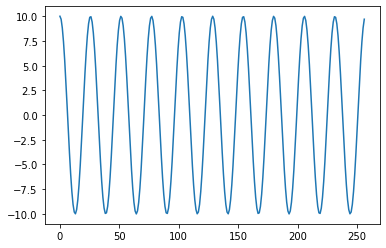

In [115]:
plt.plot(x, y)

### Amplitude spectrum

<BarContainer object of 127 artists>

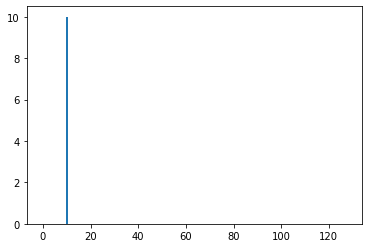

In [116]:
plt.bar(spectrum_x, a_spectrum)

### Phase spectrum

<BarContainer object of 127 artists>

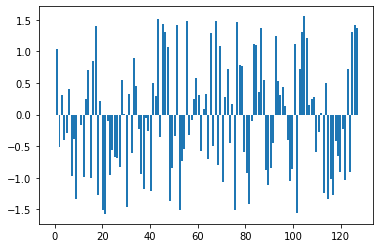

In [117]:
plt.bar(spectrum_x, p_spectrum)

### Restored

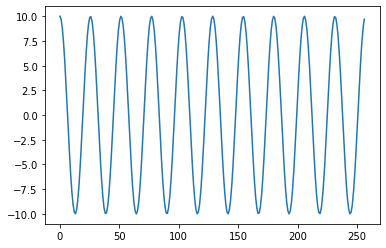

In [118]:
plt.plot(x, restored_y)

## Restore polyharmonic signal

In [119]:
y = make_polyharmonic_signal(30)

a_spectrum = make_amplitude_spectrum(y, harmonics_count)
p_spectrum = make_phase_spectrum(y, harmonics_count)
restored_y = restore_polyharmonic_signal(a_spectrum, p_spectrum)

### Original

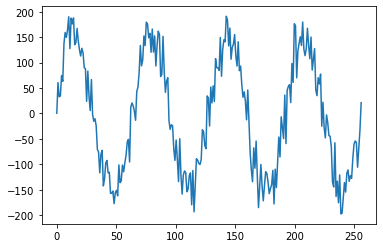

In [120]:
plt.plot(x, y)

### Amplitude spectrum

<BarContainer object of 127 artists>

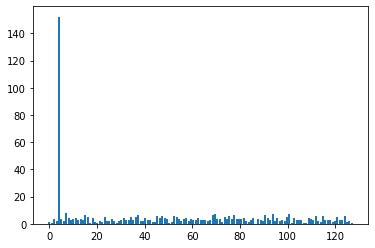

In [121]:
plt.bar(spectrum_x, a_spectrum)

### Phase spectrum

<BarContainer object of 127 artists>

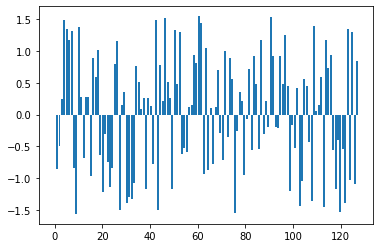

In [122]:
plt.bar(spectrum_x, p_spectrum)

### Restored

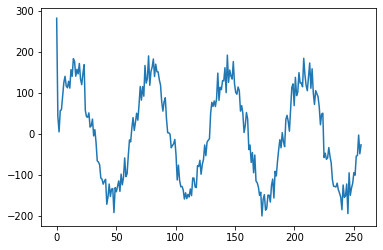

In [123]:
plt.plot(x, restored_y)

## Restore polyharmonic signal with FFT

In [127]:
from cmath import exp, pi
 
def fft(x):
    N = len(x)
    if N <= 1: 
        return x
    even = fft(x[0::2])
    odd =  fft(x[1::2])
    T= [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] +  \
           [even[k] - T[k] for k in range(N//2)]

def ifft(x):
    y = []
    N = len(x)
    for n in range(0,N):
        curry = 0
        for k in range(N):
            curry += x[k]*exp(-2j*pi*k*n/N)       
        y.append(curry/N)
    return y
        
ifft_res = (ifft(fft(y)))

### Original

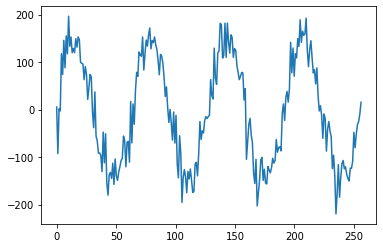

In [126]:
plt.plot(x, y)

### Restored

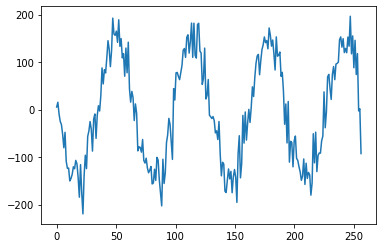

In [128]:
plt.plot(x, ifft_res)

## Filtering

In [130]:
low_freq = 5
high_freq = 10

In [ ]:
def cut_low_freq(A_spector, phase_spector, T):
    indexes = []
    new_amplitude_spector =[]
    new_phase_spector = []
    for k in range(harmonicCount):
        if (k/T <= low_freq):
            indexes.append(k)
    for index in indexes:
        new_amplitude_spector.append(amplitudespector[index])
        new_phase_spector.append(phase_spector[index])
    return new_amplitude_spector,new_phase_spector

def cut_high_freq(A_spector, phase_spector, T):
    indexes = []
    new_amplitude_spector =[]
    new_phase_spector = []
    for k in range(harmonicCount):
        if (k/T >= high_freq):
            indexes.append(k)
    for index in indexes:
        new_amplitude_spector.append(amplitudespector[index])
        new_phase_spector.append(phase_spector[index])
    return new_amplitude_spector,new_phase_spector

def cut_range_freq(A_spector, phase_spector, T):
    indexes = []
    new_amplitude_spector =[]
    new_phase_spector = []
    for k in range(harmonicCount):
        if (k/T <= high_freq and k/T >= low_freq):
            indexes.append(k)
    for index in indexes:
        new_amplitude_spector.append(amplitudespector[index])
        new_phase_spector.append(phase_spector[index])
    return new_amplitude_spector,new_phase_spector

### Original

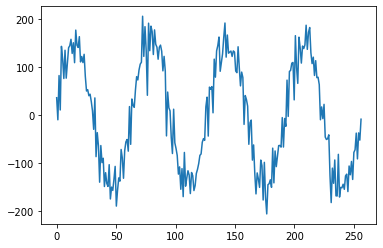

In [139]:
y = make_polyharmonic_signal(30)
plt.plot(x, y)

### Low frequnecy filtering

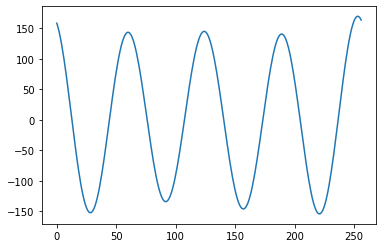

In [140]:
new_amplitude_spector, new_phase_spector = cut_low_freq(a_spectrum,p_spectrum,1)
new_y = restore_polyharmonic_signal(new_amplitude_spector, new_phase_spector)
plt.plot(x, new_y)

### High frequnecy filtering

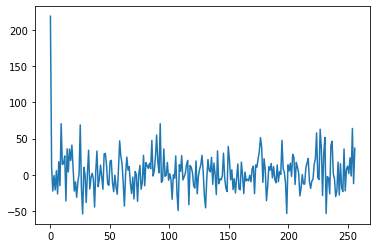

In [141]:
new_amplitude_spector, new_phase_spector = cut_high_freq(a_spectrum,p_spectrum,1)
new_y = restore_polyharmonic_signal(new_amplitude_spector, new_phase_spector)
plt.plot(x, new_y)

### Range frequnecy filtering

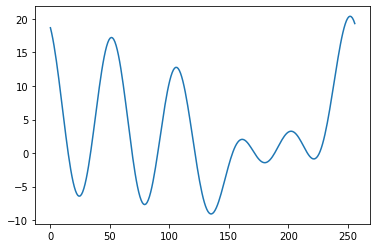

In [144]:
new_amplitude_spector, new_phase_spector = cut_range_freq(a_spectrum,p_spectrum,1)
new_y = restore_polyharmonic_signal(new_amplitude_spector, new_phase_spector)
plt.plot(x, new_y)